<a href="https://colab.research.google.com/github/duonghiepit/logistic-regression/blob/main/4_LogReg_Batch_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/AIO2023/231006/code - update_1

/content/drive/MyDrive/AIO2023/231006/code - update_1


In [3]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_full.csv',
                     dtype=None,
                     delimiter=',',
                     skip_header=1)

X = iris[:, :4]
y = iris[:, 4]

maxi = np.max(X)
mini = np.min(X)
avg = np.mean(X)
X = (X - avg) / (maxi-mini)

intercept = np.ones((X.shape[0], 1))
X = np.c_[intercept, X]

# shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)

X = X[inds]
y = y[inds]

print(X.shape)
print(y.shape)

(100, 5)
(100,)


In [43]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def predict(X, theta):
    return sigmoid_function(np.dot(X, theta))

def loss_function(y_hat, y):
    return (-y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)).mean()

def compute_gradient(X, y_hat, y):
    return np.dot(X.T, (y_hat-y)) / y.size

In [44]:
lr = 0.01
num_iter = 50000

theta = np.random.randn(5)/100.0
losses = []
accs = []

for i in range(num_iter):
    # predict z
    y_hat = predict(X, theta)

    # compute loss
    loss = loss_function(y_hat, y)

    # compute mean of gradient
    gradient = compute_gradient(X, y_hat, y)

    theta -= lr*gradient

    # for debug
    if (i%10 == 0):
        # loss
        losses.append(loss)

        # accuracy
        preds = predict(X, theta).round()
        acc = (preds == y).mean()
        accs.append(acc)


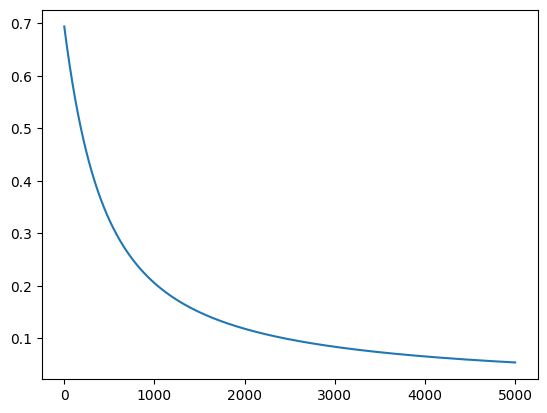

In [45]:
plt.plot(losses)
plt.show()

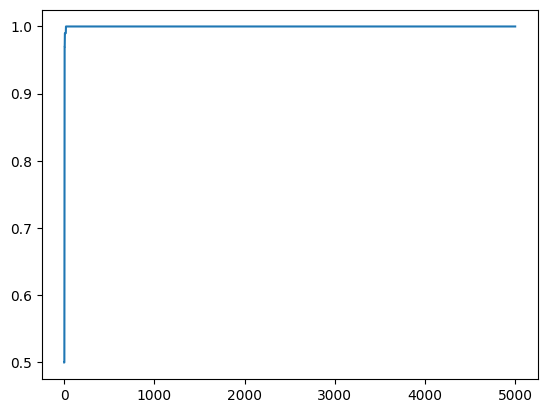

In [46]:
plt.plot(accs)
plt.show()